In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("EDAData.csv")

In [4]:
# Drop Extra Column in Data
df = df.drop(columns="Unnamed: 0")

In [149]:
dfprice = df[df["Price"] >= 0.00]

In [150]:
sns.set_style("darkgrid")

In [151]:
dfprice.Price = dfprice["Price"].round(2)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [152]:
dfprice["Price Bins"] = pd.cut(dfprice.Price, 5)

<ipython-input-152-549c06286b81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfprice["Price Bins"] = pd.cut(dfprice.Price, 5)


In [153]:
unitygroup = dfprice[dfprice["Engine"] == "Unity Engine"].groupby("Price Bins").median()
unrealgroup = dfprice[dfprice["Engine"] == "Unreal Engine"].groupby("Price Bins").median()
unitygroup["Engine"] = "Unity"
unrealgroup["Engine"] = "Unreal"
finalgroup = pd.concat([unitygroup, unrealgroup])

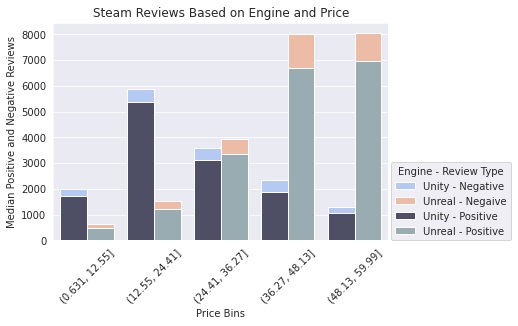

<Figure size 432x288 with 0 Axes>

In [163]:
sns.barplot(data=finalgroup, x=finalgroup.index, y=finalgroup["Positive Reviews"] + finalgroup["Negative Reviews"], hue="Engine", palette="coolwarm", ci=None)
sns.barplot(data=finalgroup, x=finalgroup.index, y=finalgroup["Positive Reviews"], hue="Engine", palette="bone", ci=None)
plt.xticks(rotation=45)
plt.ylabel("Median Positive and Negative Reviews")
plt.title("Steam Reviews Based on Engine and Price")
plt.legend(title='Engine - Review Type', loc=(1.01,0), labels=['Unity - Negative', 'Unreal - Negaive', 'Unity - Positive', 'Unreal - Positive'])
plt.show()
plt.savefig("PriceEngineReviewGraph.png")
